<a href="https://colab.research.google.com/github/Andrei198203/Data_Science_HW6/blob/main/HW6_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt





In [12]:
# Завантаження даних
data_mnist = pd.read_csv("/content/drive/MyDrive/HW6_Data_Science/mnist/mnist.csv")
data_2d = pd.read_csv("/content/drive/MyDrive/HW6_Data_Science/data_2d/data_2d.csv")

In [15]:
# Функція для обчислення внутрішньокластерного показника
def compute_inertia(data, max_clusters=10):
    inertias = []
    for k in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    return inertias

In [16]:
# Застосуємо алгоритм K-means на двовимірному датасеті
inertias_2d = compute_inertia(data_2d)

In [17]:
# Застосуємо алгоритм K-means на датасеті mnist
inertias_mnist = compute_inertia(data_mnist)

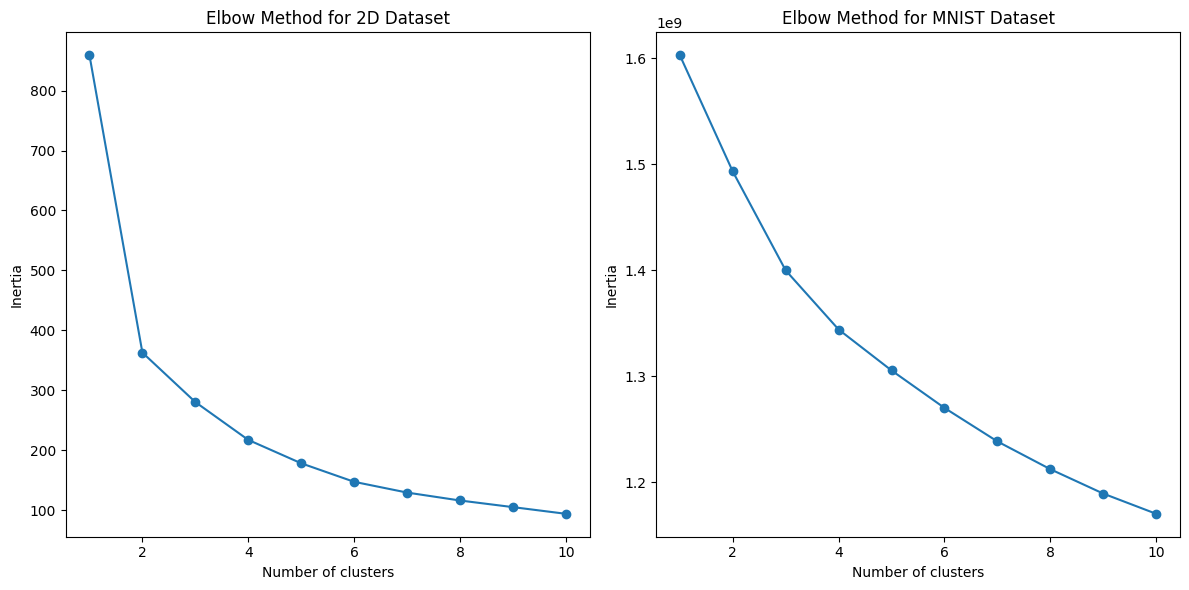

In [18]:
# Візуалізація ліктевого методу
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertias_2d, marker='o')
plt.title('Elbow Method for 2D Dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), inertias_mnist, marker='o')
plt.title('Elbow Method for MNIST Dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

In [19]:
from sklearn.decomposition import PCA

In [23]:
# Функція для візуалізації кластеризації
def visualize_clusters(data, n_clusters, title):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    labels = kmeans.fit_predict(data)
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster')
    plt.show()

In [24]:
# Застосуємо PCA для зменшення розмірності даних mnist до 2
pca = PCA(n_components=2)
data_mnist_pca = pca.fit_transform(data_mnist)

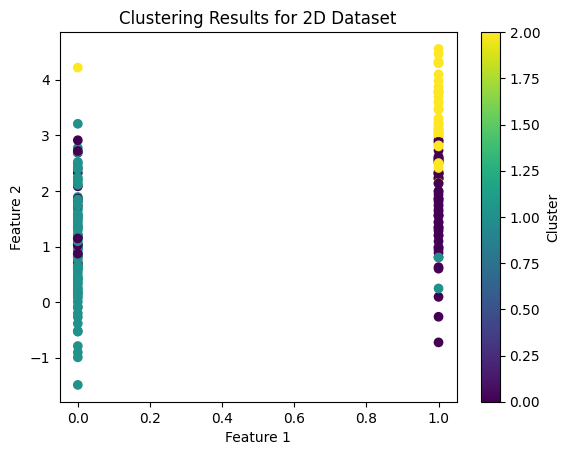

In [25]:
# Візуалізація результатів кластеризації для двовимірного датасету
visualize_clusters(data_2d.values, n_clusters=3, title='Clustering Results for 2D Dataset')

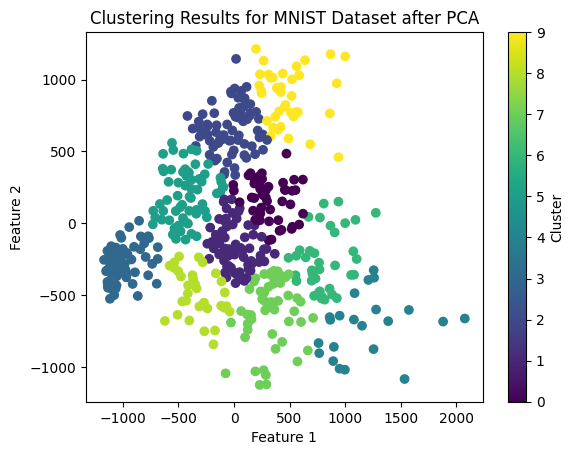

In [26]:
# Візуалізація результатів кластеризації для датасету mnist
visualize_clusters(data_mnist_pca, n_clusters=10, title='Clustering Results for MNIST Dataset after PCA')